## Snapshot based approach

,,geometry,@changesetId,@lastEdit,@osmType,@version
@osmId,@snapshotTimestamp,,,,,
node/1000198750,2022-12-11 21:00:00,POINT (13.38390 52.46549),93886140,2020-11-10T22:11:28Z,node,13
node/10013676832,2022-12-11 21:00:00,POINT (13.37508 52.55178),126024718,2022-09-10T17:42:38Z,node,2
node/1001470709,2022-12-11 21:00:00,POINT (13.35441 52.48807),119637158,2022-04-12T19:54:32Z,node,12
node/1001470733,2022-12-11 21:00:00,POINT (13.35464 52.48779),119637158,2022-04-12T19:54:32Z,node,6
node/1003097084,2022-12-11 21:00:00,POINT (13.41700 52.54006),114163779,2021-11-24T08:27:16Z,node,15
...,...,...,...,...,...,...
node/9981823764,2022-12-11 21:00:00,POINT (13.42249 52.49187),125465514,2022-08-28T07:20:31Z,node,2
node/9983586196,2022-12-11 21:00:00,POINT (13.41193 52.50109),126543531,2022-09-23T11:39:14Z,node,2
node/9988779539,2022-12-11 21:00:00,POINT (13.31244 52.56975),125575930,2022-08-30T15:37:08Z,node,1


<AxesSubplot:>

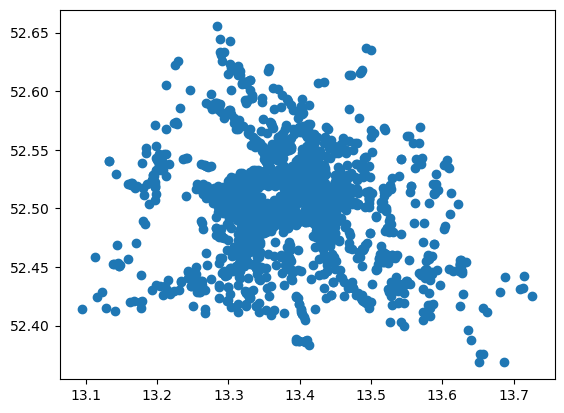

In [1]:
import pandas as pd
import geopandas as gpd
from ohsome import OhsomeClient
client = OhsomeClient()

# load the geojson file with geopandas
bpolys = gpd.read_file("./data/berlin.geojson")

# Define which OSM features should be considered.
filter = "amenity=restaurant and opening_hours=* and geometry:point"

# Here we do not set the timestamps parameters.
# This defaults to the most recent timestamp available.
# If you also want to extract the tags, you can use properties=tags,metadata
response = client.elements.geometry.post(
    bpolys=bpolys, 
    filter=filter,
    properties="metadata"
)

results_df = response.as_dataframe()

display(results_df)
results_df.plot()

# results_df.to_file("./data/berlin_restaurants.geojson", driver='GeoJSON')

,count,mean,min,25%,50%,75%,max
category,,,,,,,
post-covid,2475,2022-03-15 13:08:49.901414400+00:00,2020-03-02 14:15:26+00:00,2021-10-09 13:14:11.500000+00:00,2022-06-21 19:32:32+00:00,2022-10-01 10:25:54+00:00,2022-12-11 17:31:45+00:00
pre-covid,569,2018-07-27 07:13:59.688927744+00:00,2011-05-22 17:58:09+00:00,2017-10-03 10:12:27+00:00,2019-01-12 16:15:53+00:00,2019-07-09 07:06:13+00:00,2020-02-22 21:21:30+00:00


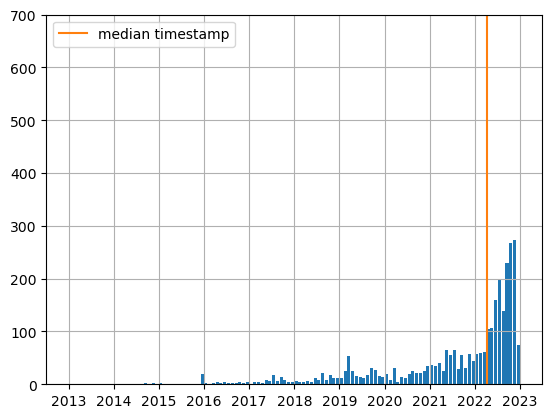

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Here we expect that you've already created the dataframe, e.g. by querying the ohsome API.
# results_df = gpd.read_file("./data/berlin_restaurants.geojson")

# make sure to properly set up lastEdit as a timestamp
results_df["@lastEdit"] = pd.to_datetime(results_df["@lastEdit"])

# add a new field 'category' and the default value 'post-covid'
results_df["category"] = 'post-covid'
# update the "category" attribute for all features which have been edited before 2020-03-01
results_df.loc[results_df["@lastEdit"] < "2020-03-01", "category"] = "pre-covid"

# check pandas documentation how to use 'describe()' with timestamps
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html
display(
    results_df.groupby('category')["@lastEdit"].describe(datetime_is_numeric=True)
)

plt.figure()
# Check the matplotlib.pyplot docu for more information on the parameter
# such as 'rwidth', 'bin' and 'range'.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(
    results_df["@lastEdit"],
    bins=120,
    range=["2013-01-01", "2023-01-01"],
    rwidth=0.8,
)

median_timestamp = results_df["@lastEdit"].median()
plt.plot(
    [median_timestamp, median_timestamp],
    [0, 700],
    label="median timestamp"
)
plt.ylim([0, 700])
plt.grid()
plt.legend()
plt.show()

,,value
fromTimestamp,toTimestamp,
2013-01-01 00:00:00+00:00,2013-02-01 00:00:00+00:00,126.0
2013-02-01 00:00:00+00:00,2013-03-01 00:00:00+00:00,19.0
2013-03-01 00:00:00+00:00,2013-04-01 00:00:00+00:00,44.0
2013-04-01 00:00:00+00:00,2013-05-01 00:00:00+00:00,20.0
2013-05-01 00:00:00+00:00,2013-06-01 00:00:00+00:00,37.0
...,...,...
2022-07-01 00:00:00+00:00,2022-08-01 00:00:00+00:00,391.0
2022-08-01 00:00:00+00:00,2022-09-01 00:00:00+00:00,271.0
2022-09-01 00:00:00+00:00,2022-10-01 00:00:00+00:00,375.0


[]

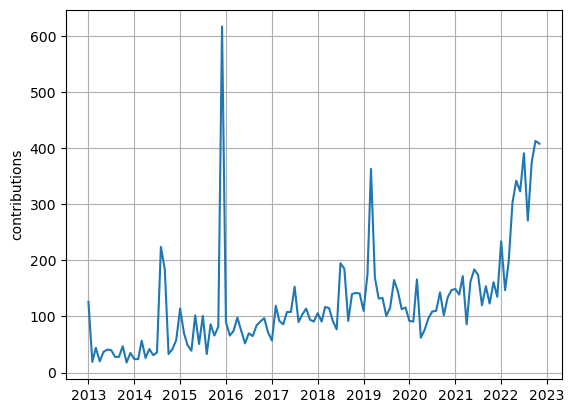

In [3]:
import pandas as pd
import geopandas as gpd
from ohsome import OhsomeClient
client = OhsomeClient()

# load the geojson file with geopandas
bpolys = gpd.read_file("./data/berlin.geojson")

# Define which OSM features should be considered.
filter = "amenity=restaurant and opening_hours=* and geometry:point"

# Here we set timestamps parameter to a monthly interval
# between 2013-01-01 and 2022-12-01 
response = client.contributions.count.post(
    bpolys=bpolys, 
    filter=filter,
    time="2013-01-01/2022-12-01/P1M",
)

# display results as dataframe
results_df = response.as_dataframe()
display(results_df)

# plot monthly mapping activity
results_df.reset_index(inplace=True)
plt.figure()
plt.plot(
    results_df["fromTimestamp"],
    results_df["value"],
)
plt.grid()
plt.ylabel("contributions")
plt.plot()